https://www.python.org/downloads/release/python-364/

In [122]:
import phonetic
import corpus
import generate_sample
import rhymetools
import verse
import re
import nltk
import importlib
import string
import seaborn
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
nltk.download('cmudict')
nltk.download('gutenberg')
dictionary = phonetic.PhoneticDictionary()
dictionary.import_file("data/cmudict/cmudict-0.7b")

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\Marissa\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Marissa\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [144]:
def reload():
    importlib.reload(corpus)
    importlib.reload(phonetic)
    importlib.reload(generate_sample)
    importlib.reload(rhymetools)
    importlib.reload(verse)
    
def get_corp(filename):
    
    reload()
    corp = corpus.WordCorpus(dictionary)
    corp.initialize(filename)
    corp.initializeMatrix()
    corp.initializeSylDict()
    return corp
    
def rhyme_demo():
    reload()
    
    template = verse.VerseTemplate(verse.get_sample(1), dictionary, 
                                   breakrules='phrase')
    template.get_rhyme(verbose=True)
    plt.spy(template.rhyme_matrix)
    plt.show()
    
def full_demo(corpfile, template_string, verbose=False):
    corp = get_corp(corpfile)
    print("\nTemplate text:", template_string)
    template = verse.VerseTemplate(template_string, dictionary, 
                                       breakrules="phrase")
    template.get_rhyme(verbose=verbose)
    print("\nOverall Result:", generate_sample.fill_template(corp,template,
                                                            verbose=verbose))

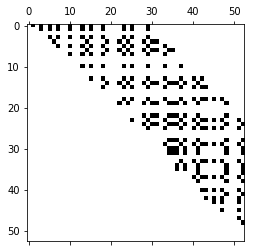


Template length:  53 syllables, 37 words

Template:
How does a bastard, orphan, son of a whore and a scotsman, dropped in the middle of a forgotten spot in the caribbean by providence, impoverished, in squalor, grow up to be a hero and a scholar?

Stress pattern:
 #  #  /  #  /,  #  /,  #  #  /  #  /  /  #  /,  #  /  /  #  /  #  /  /  #  /  #  /  /  /  #  /  /  #  #  /  /,  /  #  /,  /  #  /,  #  #  #  #  /  #  /  /  /  #  /, 

Desired number of match pairs: 5.0

Number of nonzero indices: 236

Percentile for cutoff: 98.0
Cutoff score:  0.9533233539410668

Pairs to match (7):
  95.9 % match: syllable 2 of orphan + syllable 3 of forgotten 
	 6 , 24
  96.7 % match: syllable 2 of scotsman + syllable 3 of forgotten 
	 14 , 24
  95.8 % match: syllable 2 of forgotten + syllable 1 of spot 
	 23 , 25
  95.3 % match: syllable 1 of caribbean + syllable 2 of squalor 
	 28 , 41
  95.3 % match: syllable 1 of caribbean + syllable 2 of scholar 
	 28 , 52
  96.3 % match: syllable 1 of squalor + sylla

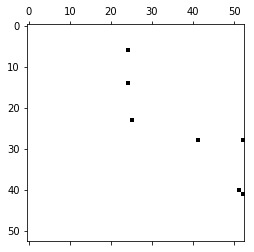

In [146]:
rhyme_demo()

In [152]:
full_demo("alexander_hamilton.txt", verse.get_sample(4), verbose=True)

Corpus text: 547 words, 256 unique

Template text: buddy you're a boy, make a big noise, playing in the street, gonna be a big man some day, you got mud on your face, you big disgrace, kicking your can all over the place

Template length:  41 syllables, 35 words

Template:
buddy you're a boy, make a big noise, playing in the street, gonna be a big man some day, you got mud on your face, you big disgrace, kicking your can all over the place

Stress pattern:
 #  /  #  /  #,  #  /  #  #,  #  /  /  /  #,  #  /  #  /  #  #  #  #,  #  #  #  #  #  #,  #  #  /  #,  #  /  #  #  #  #  /  /  # 

Desired number of match pairs: 4.0

Number of nonzero indices: 360

Percentile for cutoff: 99.0
Cutoff score:  0.9575232060438056

Pairs to match (5):
  96.2 % match: syllable 1 of buddy + syllable 1 of mud 
	 0 , 24
  95.8 % match: syllable 1 of playing + syllable 1 of day 
	 9 , 21
  96.1 % match: syllable 1 of face + syllable 2 of disgrace 
	 27 , 31
  95.9 % match: syllable 1 of face + syllable 1 of p

IndexError: index 41 is out of bounds for axis 0 with size 41